In [1]:
#Importing Libraries
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

2024-07-16 09:58:16.472000: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-07-16 09:58:16.472032: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#Extract Filenames from Folder
filenames = []
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))
    

In [3]:
len(filenames)

44441

In [4]:
#Importing ResNet50 Model and Cofiguration
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False

model = tf.keras.models.Sequential([model,
                                   GlobalMaxPool2D()
                                   ])
model.summary()

2024-07-16 09:58:18.793783: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-07-16 09:58:18.793816: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-07-16 09:58:18.793836: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (codespaces-9c39bb): /proc/driver/nvidia/version does not exist
2024-07-16 09:58:18.794009: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [5]:
#Extracting Fetaures from Image
img = image.load_img('/workspaces/codespaces-jupyter/images/2054.jpg', target_size=(224,224))
img_array = image.img_to_array(img)
img_expand_dim = np.expand_dims(img_array, axis=0)
img_preprocess = preprocess_input(img_expand_dim)
result = model.predict(img_preprocess).flatten()
norm_result = result/norm(result)
norm_result

1/1 [==============================] - 1s 689ms/step


array([0.        , 0.0459846 , 0.00596217, ..., 0.        , 0.02201957,
       0.00741793], dtype=float32)

In [6]:
#Building function and make stuff easy to process
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [7]:
extract_features_from_images(filenames[0], model)

1/1 [==============================] - 0s 79ms/step


array([0.00205784, 0.00458283, 0.00220059, ..., 0.00537448, 0.05693985,
       0.04990778], dtype=float32)

In [8]:
#feature extraction for given images 
image_features = []
for file in filenames:
    image_features.append(extract_features_from_images(file, model))
image_features

1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 72ms/step


[array([0.00205784, 0.00458283, 0.00220059, ..., 0.00537448, 0.05693985,
        0.04990778], dtype=float32),
 array([0.        , 0.01459687, 0.        , ..., 0.01481133, 0.        ,
        0.00423269], dtype=float32),
 array([0.00194436, 0.01540064, 0.01357353, ..., 0.01866452, 0.02813575,
        0.06558327], dtype=float32),
 array([0.01112478, 0.04183231, 0.0070094 , ..., 0.0053688 , 0.00144447,
        0.0618389 ], dtype=float32),
 array([0.        , 0.01016693, 0.01118609, ..., 0.00495616, 0.00281339,
        0.00167132], dtype=float32),
 array([0.        , 0.08046421, 0.00910801, ..., 0.01431649, 0.02507513,
        0.02052388], dtype=float32),
 array([0.01306738, 0.0923714 , 0.02139316, ..., 0.00379904, 0.01363212,
        0.05319819], dtype=float32),
 array([0.        , 0.00367931, 0.00230666, ..., 0.        , 0.        ,
        0.00556121], dtype=float32),
 array([0.        , 0.03320944, 0.        , ..., 0.02049914, 0.00801226,
        0.02496207], dtype=float32),
 array([0.

In [9]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [10]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

In [11]:
#Loading Pickle Files
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [12]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [13]:
#Finidng Simialar Images
# Initialize the NearestNeighbors object
# n_neighbors: The number of neighbors to use by default for k_neighbors queries
# algorithm: The algorithm to use for nearest neighbors search. 'brute' uses a brute-force search.
# metric: The distance metric to use. 'euclidean' calculates the standard Euclidean distance.
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [14]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [15]:
#input image to extract its features - 1
input_image = extract_features_from_images('/workspaces/codespaces-jupyter/images/1526.jpg',model)

1/1 [==============================] - 0s 75ms/step


In [16]:
distance,indices = neighbors.kneighbors([input_image])

In [17]:
indices[0]

array([9340, 6729, 9713, 7281, 3677, 6023])

In [18]:
from IPython.display import Image

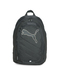

In [19]:
#input image 
Image('/workspaces/codespaces-jupyter/images/1526.jpg')

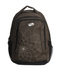

In [20]:
#recommended images no.1
Image(filenames[indices[0][1]])

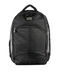

In [21]:
#recommended images no.2
Image(filenames[indices[0][2]])

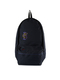

In [22]:
#recommended images no.3
Image(filenames[indices[0][3]])

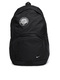

In [23]:
#recommended images no.4
Image(filenames[indices[0][4]])

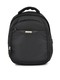

In [24]:
#recommended images no.5
Image(filenames[indices[0][5]])

In [51]:
#input image to extract its features - 2
input_image = extract_features_from_images('/workspaces/codespaces-jupyter/images/1887.jpg',model)

1/1 [==============================] - 0s 87ms/step


In [52]:
distance,indices = neighbors.kneighbors([input_image])

In [53]:
indices[0]

array([6121,  486, 8389, 7234, 9439, 6763])

In [54]:
from IPython.display import Image

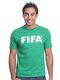

In [55]:
#input image -2
Image('/workspaces/codespaces-jupyter/images/1887.jpg')

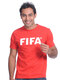

In [56]:
#recommended images no.1
Image(filenames[indices[0][1]])

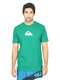

In [57]:
#recommended images no.2
Image(filenames[indices[0][2]])

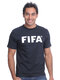

In [58]:
#recommended images no.3
Image(filenames[indices[0][3]])

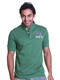

In [59]:
#recommended images no.4
Image(filenames[indices[0][4]])

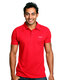

In [60]:
#recommended images no.5
Image(filenames[indices[0][5]])